# 人工神经网络 

## 1 感知机模型-鸢尾花数据集分类 

### 1.1 鸢尾花可视化分析    

观察到品种‘Iris-setosa’与‘Iris-versicolor’之间是线性可分的 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris() 
X = iris.data  # 样本特征
y = iris.target  # 样本标签


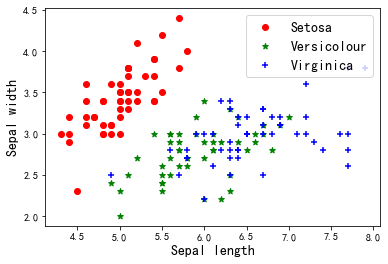

In [3]:
plt.scatter(X[:50, 0], X[:50, 1], c = "red", marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], c = "green", marker='*', label='Versicolour')
plt.scatter(X[100:150, 0], X[100:150, 1], c = "blue", marker='+', label='Virginica')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

画出数据集中150个数据的**前两个特征**的散点分布图，

观察到品种‘Iris-setosa’与‘Iris-versicolor’之间是线性可分的

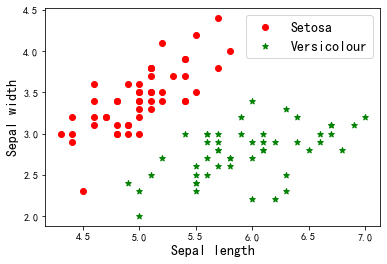

In [4]:
plt.scatter(X[:50, 0], X[:50, 1], c = "red", marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], c = "green", marker='*', label='Versicolour')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

### 1.2 Perceptron算法

In [5]:
X_2,y_2 = X[:100,:2],y[:100]

In [6]:
import sklearn
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X_2, y_2)


Perceptron()

In [7]:
# Weights assigned to the features.
print(clf.coef_)
# 截距 Constants in decision function.
print(clf.intercept_)

[[ 23.2 -38.7]]
[-5.]


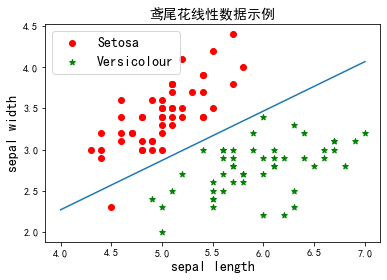

In [8]:
plt.title('鸢尾花线性数据示例')

plt.scatter(X_2[:50, 0], X_2[:50, 1], c = "red", marker='o', label='Setosa')
plt.scatter(X_2[50:100, 0], X_2[50:100, 1], c = "green", marker='*', label='Versicolour')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0] * x_ponits + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

In [9]:
import sklearn
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=True,max_iter=1000, 
                 shuffle=True,tol=None)
clf.fit(X_2, y_2)

Perceptron(tol=None)

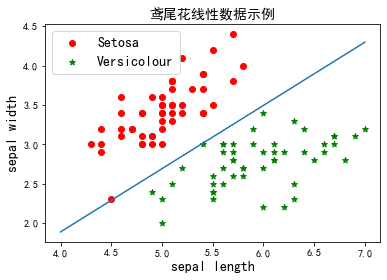

In [10]:
plt.title('鸢尾花线性数据示例')

plt.scatter(X_2[:50, 0], X_2[:50, 1], c = "red", marker='o', label='Setosa')
plt.scatter(X_2[50:100, 0], X_2[50:100, 1], c = "green", marker='*', label='Versicolour')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0] * x_ponits + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 2 MLP模型

In [11]:
import torch
from torch import nn

class MLP(nn.Module):
    # 声明带有模型参数的层，此处声明了2个全连接层
    def __init__(self, **kwargs):
        # 调用MLP父类Block的构造函数来进行必要的初始化
        # 这样在构造实例时还可以指定其他函数
        super(MLP, self).__init__(**kwargs)
        self.hidden = nn.Linear(784, 256)
        self.act = nn.ReLU()
        self.output = nn.Linear(256, 10)
        
    # 定义模型的前向计算
    # 即如何根据输入x计算返回所需要的模型输出
    def forward(self, x):
        o = self.act(self.hidden(x))
        return self.output(o)
    
X = torch.rand(2, 784)
net = MLP()
print(net)
print('-' * 60)
print(net(X))

MLP(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (act): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)
------------------------------------------------------------
tensor([[-2.2123e-01, -8.4843e-02,  2.6160e-01, -3.1493e-02,  8.9158e-02,
          1.0538e-01, -1.6339e-01, -9.7994e-02, -2.1513e-02,  9.6858e-07],
        [-1.8761e-01, -1.3733e-01,  1.8168e-01,  9.0088e-02, -2.4744e-02,
          2.5689e-01, -1.4982e-01, -6.1899e-02, -5.9790e-02, -9.3619e-02]],
       grad_fn=<AddmmBackward0>)


In [12]:
list(net.parameters())[3].size()

torch.Size([10])